## CS345 Fall 2024 Assignment 3


### Datasets

* The [QSAR](http://archive.ics.uci.edu/ml/datasets/QSAR+biodegradation) data for predicting the biochemical activity of a molecule.
* The [Wisconsin breast cancer wisconsin dataset](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_breast_cancer.html#sklearn.datasets.load_breast_cancer).
  

## Part 1:  choosing optimal hyperparameters

Just about any machine learning algorithm has some **hyperparameters**.  These are parameters that are set by the user and are not determined as part of the training process.
The perceptron for example, has two of those - the number of epochs and the learning rate.  For the k-nearest neighbor classifier (kNN) it's the number of neighbors, $k$, and for the linear SVM it's the soft margin constant, $C$.  Our objective in machine learning is to obtain classifiers with high accuracy, and have good estimates of how well they are performing.  In other words, we need to know how accurate a classifier would be on unseen data.  This is why we use separate test sets that the classifier has not seen for evaluating accuracy.

When working with classifiers with hyperparameters you may be tempted to apply the following procedure:

* Randomly split the data into separate train and test sets.
* Loop over a list of candidate values for the hyperparameter.
* For each value, train the classifier over the training set and evaluate its accuracy on the test set.
* Choose the parameter value that maximizes the accuracy over the test set, and report the accuracy that you obtained.

However, it turns out that this procedure is flawed, and the resulting accuracy estimate can be overly optimistic.  This is because the choice of the best performing parameter value used information about the test set: by selecting the best value according to accuracy on the test set, we use information about the labels of the test set.  Therefore, the predicted labels are based on information regarding the labels of the test set, making it so this is no longer an independent test set.

Here is a better approach.  Rather than splitting the data into train and test sets, we will now split the data into three sets:  **training, validation, and test**.  The validation set will be used for evaluation of different values of the hyperparameter, leading to the following approach:

* Randomly split the data into separate train, validation, and test sets (say with ratios of 0.5, 0.2, 0.3).
* Loop over a list of candidate values for the hyperparameter.
* For each value, train the classifier over the **training set** and evaluate its accuracy on the **validation set**. 
* Choose the best classifier, and report its accuracy over the **test set**.

Your task is as follows:

* Use the method described above to evaluate the accuracy of the kNN classifier over the QSAR and Wisconsin breast cancer dataset.  When iterating over the hyperparameter value $k$, use a wide range of values.  Repeat the process ten times for different data splits and report the average accuracy over the test set and the value of $k$ that was chosen most often for each dataset.  The result should be in the form of a table that shows average accuracy and most common hyperparameter value for each dataset.  We recommend using pandas to display nicely formatted tables as suggested in assignment 2.  Note that the optimal value of $k$ may vary for different splits.  Comment on your results.

* Perform the same experiment for the linear SVM. In this case the soft-margin constant $C$ is the hyperparameter that requires an informed choice.  Use a wide range of values for $C$, as we have done in class.  Comment on your results.

In your code, use the scikit-learn kNN and SVM implementations; you can also use the scikit-learn `train_test_split`.  When using scikit-learn's [SVC](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html) class, make sure to provide the parameter `kernel="linear"` so that the the resulting SVM is indeed linear; alternatively, use the [LinearSVC](https://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html) class.

In [11]:
# imports
import numpy as np
import pandas as pd
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier


# load data functions
def load_qsar():
    filename='data/biodeg.csv'
    qsar_data = pd.read_csv(filename, sep=";")
    X = qsar_data.iloc[:,:-1].astype(np.float64)
    y = qsar_data.iloc[:,-1]
    try:
        y = y.astype(np.float64)
    except Exception as e:
        y = np.where(y == "RB", 1, -1)
    else:
        y = np.where(y == 0, -1, 1) 
    return X, y

def load_breast_cancer():
    # use the scikit-learn data loader
    X, y = sklearn.datasets.load_breast_cancer(return_X_y=True)
    return X, y


# load data and split it into train, val, and test sets
X_qsar, y_qsar = load_qsar()
X_qsar_train, X_qsar_test, y_qsar_train, y_qsar_test = train_test_split(X_qsar, y_qsar, test_size=0.25, random_state=1)
X_qsar_train, X_qsar_val, y_qsar_train, y_qsar_val = train_test_split(X_qsar_train, y_qsar_train, test_size=0.5, random_state=1)

X_breast, y_breast = load_breast_cancer()
X_breast_train, X_breast_test, y_breast_train, y_qsar_test = train_test_split(X_breast, y_breast, test_size=0.25, random_state=1)
X_breast_train, X_breast_val, y_breast_train, y_breast_val = train_test_split(X_breast_train, y_breast_train, test_size=0.5, random_state=1)


# loop over hyperparameter values
ks = [1, 3, 5, 7, 9, 11, 15, 21, 25, 31]
knn_qsar_results = []
knn_breast_results = []
for k in ks:
  knn = KNeighborsClassifier(n_neighbors=k)
  
  knn.fit(X_qsar_train, y_qsar_train)
  y_qsar_pred = knn.predict(X_qsar_val) 
  accuracy_qsar = accuracy_score(y_qsar_val, y_qsar_pred)
  knn_qsar_results.append({'k': k, 'accuracy': accuracy_qsar}) 
  
for k in ks:
  knn = KNeighborsClassifier(n_neighbors=k)
  
  knn.fit(X_breast_train, y_breast_train)
  y_breast_pred = knn.predict(X_breast_val) 
  accuracy_breast = accuracy_score(y_breast_val, y_breast_pred)
  knn_breast_results.append({'k': k, 'accuracy': accuracy_breast}) 


# loop over C values
cs = [0.01, 0.1, 1, 10, 100]
svm_qsar_results = []
svm_breast_results = []
for c in cs:
  svm = SVC(C=c, kernel='linear')
  
  svm.fit(X_qsar_train, y_qsar_train)
  y_qsar_pred = svm.predict(X_qsar_val) 
  accuracy_qsar = accuracy_score(y_qsar_val, y_qsar_pred)
  svm_qsar_results.append({'C': c, 'accuracy': accuracy_qsar}) 
  
for c in cs:
  svm = SVC(C=c, kernel='linear')
   
  svm.fit(X_breast_train, y_breast_train)
  y_breast_pred = svm.predict(X_breast_val) 
  accuracy_breast = accuracy_score(y_breast_val, y_breast_pred)
  svm_breast_results.append({'C': c, 'accuracy': accuracy_breast}) 

svm_breast_results_df = pd.DataFrame(svm_breast_results)
knn_breast_results_df = pd.DataFrame(knn_breast_results)
svm_qsar_results_df = pd.DataFrame(svm_qsar_results)
knn_qsar_results_df = pd.DataFrame(knn_qsar_results)
display(svm_breast_results_df)
display(knn_breast_results_df)
display(svm_qsar_results_df)
display(knn_qsar_results_df)

,C,accuracy
0,0.01,0.929577
1,0.10,0.934272
2,1.00,0.938967
3,10.00,0.938967
4,100.00,0.929577


,k,accuracy
0,1,0.910798
1,3,0.920188
2,5,0.929577
3,7,0.929577
4,9,0.934272
5,11,0.934272
6,15,0.929577
7,21,0.924883
8,25,0.929577
9,31,0.924883


,C,accuracy
0,0.01,0.817722
1,0.10,0.863291
2,1.00,0.865823
3,10.00,0.855696
4,100.00,0.865823


,k,accuracy
0,1,0.769620
1,3,0.754430
2,5,0.756962
3,7,0.772152
4,9,0.756962
5,11,0.764557
6,15,0.754430
7,21,0.764557
8,25,0.754430
9,31,0.751899


For the SVM results over the breast cancer dataset, the sweet spot is around 1-10. For the kNN classifier, the sweet spot is about 9-11.

For the SVM results over the QSAR dataset, the sweet spots are at 1 and 10. For the kNN classifier, the sweet spots are at 0, 7 (highest), and 11 and 21.

## Part 2:  PCA for removing noise from data

As we have seen in class, the accuracy of the nearest neighbor classifer degrades when the data has noisy features that are not relevant to the classification problem.  To remedy this problem, we will use PCA to reduce the dimensionality of the data.

Here is what you need to do:

* **Classifier accuracy with and without noise**.  Use the QSAR dataset and evaluate the accuracy of the K nearest neighbors and SVM classifiers.  For simplicity, choose the values of $k$ and $C$ that you selected in part 1.  In your experiments, standardize the dataset.  Next, add 1,000 noise features and evaluate model accuracy after doing so (use the better performing dataset between standardized / non-standardized dataset as your starting point).

* **Note:** here is a code snippet for generating noise with a Gaussian distribution:
```Python
# generate a matrix of "noise" features of size N x d
# each component of the matrix will have a normal (Gaussian) distribution
# with mean of 0 and standard deviation equal to 0.5
rng = np.random.default_rng(seed)
X_noise = rng.normal(0, 0.5, size=(N, d))
```

* **Can PCA improve accuracy on noisy data?**  Next, we will see if PCA can improve the accuracy of the classifier on the data we added noise to.  Use PCA to represent the noise-added data in the space of the principal components.  Make sure the data is centered or standardized before applying PCA.  (Recall that centering refers to subtracting the mean from each feature, making it so that each feature has a mean of 0).  Note that the noise features do not need to be standardized!  Evaluate the accuracy of the KNN and SVM classifiers as you vary the number of principal components (no need to go above the original dimensionality of the dataset when doing so).  Plot the accuracy of each classifier on the test set as you vary the number of components.
* **Discussion**.  Discuss your results:  was PCA useful for improving classifier accuracy?  Which of the two classifiers appears to be more robust to noise?  Why do you think that is the case?


knn accuracy: 0.8405063291139241
svm accuracy: 0.8481012658227848
knn accuracy (noisy): 0.8405063291139241
svm accuracy (noisy): 0.8481012658227848


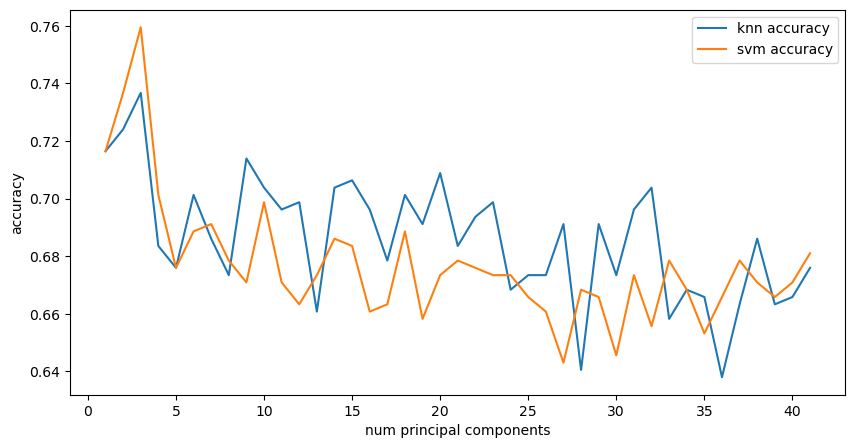

In [12]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt


scaler = StandardScaler()
X_qsar_train_std = scaler.fit_transform(X_qsar_train)
X_qsar_val_std = scaler.fit_transform(X_qsar_val)
X_qsar_test_std = scaler.fit_transform(X_qsar_test)

best_k = 7
best_c = 1.0

knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(X_qsar_train_std, y_qsar_train)
y_qsar_pred = knn.predict(X_qsar_val_std)
knn_accuracy = accuracy_score(y_qsar_val, y_qsar_pred)

svm = SVC(C=best_c, kernel='linear')
svm.fit(X_qsar_train_std, y_qsar_train)
y_qsar_pred = svm.predict(X_qsar_val_std)
svm_accuracy = accuracy_score(y_qsar_val, y_qsar_pred)

print(f"knn accuracy: {knn_accuracy}")
print(f"svm accuracy: {svm_accuracy}")


noise = 1000
rng = np.random.default_rng(1)
X_qsar_train_noise = rng.normal(0, 0.5, size=(X_qsar_train_std.shape[0], noise))
X_qsar_val_noise = rng.normal(0, 0.5, size=(X_qsar_val_std.shape[0], noise))
X_qsar_test_noise = rng.normal(0, 0.5, size=(X_qsar_test_std.shape[0], noise))

X_qsar_train_noisy = np.hstack((X_qsar_train_std, X_qsar_train_noise))
X_qsar_val_noisy = np.hstack((X_qsar_val_std, X_qsar_val_noise))
X_qsar_test_noisy = np.hstack((X_qsar_test_std, X_qsar_test_noise))

knn.fit(X_qsar_train_noisy, y_qsar_train)
y_qsar_pred = knn.predict(X_qsar_val_noisy)
knn_accuracy_noisy = accuracy_score(y_qsar_val, y_qsar_pred)

svm.fit(X_qsar_train_noisy, y_qsar_train)
y_qsar_pred = svm.predict(X_qsar_val_noisy)
svm_accuracy_noisy = accuracy_score(y_qsar_val, y_qsar_pred)

print(f"knn accuracy (noisy): {knn_accuracy}")
print(f"svm accuracy (noisy): {svm_accuracy}")


ns = range(1, X_qsar_train_std.shape[1] + 1)
knn_accuracies_pca = []
svm_accuracies_pca = []

for n in ns:
  pca = PCA(n_components=n)
  X_qsar_train_pca = pca.fit_transform(X_qsar_train_noisy)
  X_qsar_val_pca = pca.fit_transform(X_qsar_val_noisy)
  X_qsar_test_pca = pca.fit_transform(X_qsar_test_noisy)
  
  knn.fit(X_qsar_train_pca, y_qsar_train)
  y_qsar_pred = knn.predict(X_qsar_val_pca) 
  knn_accuracies_pca.append(accuracy_score(y_qsar_val, y_qsar_pred))

  svm.fit(X_qsar_train_pca, y_qsar_train)
  y_qsar_pred = svm.predict(X_qsar_val_pca) 
  svm_accuracies_pca.append(accuracy_score(y_qsar_val, y_qsar_pred))

plt.figure(figsize=(10,5)) 
plt.plot(ns, knn_accuracies_pca, label='knn accuracy')
plt.plot(ns, svm_accuracies_pca, label='svm accuracy')
plt.xlabel('num principal components')
plt.ylabel('accuracy')
plt.legend()
plt.show()

PCA was pretty helpful for classifier accuracy. The SVM classifier was more robust for noise overall because it focuses on support vectors and is not as affected by outliers.

### Code organization

Both tasks in this assignment require you to run a particular experiment over multiple classifiers, datasets, or pre-processing steps.  In writing your code refrain from repeating the code over and over again.  To achieve that, decompose the task such that your code is modular and concise.  Not only will your code be more readable and elegant, this will also enable you to be more productive.

### Part 3:  Use of AI and other web resources

In the cell below indicate in detail how you used AI and other web resources for this assignment.  If you used AI tools, indicate how useful they were.

I used AI to give me sane values for my k and C in part 1. These values were good for helping to identify the best values of k and C to use for accuracy.

### Your Report

Answer the questions in the cells reserved for that purpose.

### Submission

Submit your report as a Jupyter notebook via Canvas.  Running the notebook should generate all the plots in your notebook.

### Grading 

```
Grading sheet for assignment 3

Part 1:  50 points
Model selection code for SVM/KNN (40 pts)
Discussion of your results (5 pts)
Code organization (5 pts)

Part 2:  50 points
Baseline SVM/KNN accuracy (10 pt)
SVM/KNN accuracy as a function of number of PCs (25 pts)
Discussion of your results (10 pt)
Code organization (5 pts)

Make sure you address your use of AI and web resources
```

Grading should be based on the following criteria:

  * Code correctness.
  * Code organization.  You code is well organized without unnecessary duplication.
  * Plots and other results are well formatted and easy to understand.
  * Interesting and meaningful observations made where requested.
  * Notebook is readable, well-organized, and concise.
  
